In [1]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics


In [4]:
titles = pd.read_csv("titles.csv")

In [5]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,60933.0,9.013,7.357
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60244.0,14.759,7.433
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1149.0,15.424,7.600
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"['western', 'drama', 'romance', 'action']",['US'],NaN,tt0040724,7.8,32210.0,12.400,7.400


In [7]:
titles.shape

(10873, 15)

In [8]:
titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,10873.000000,10873.000000,1551.000000,9765.000000,9.753000e+03,10302.000000,8747.000000
mean,2004.077807,85.869033,2.661509,5.970558,8.973232e+03,7.614083,5.977729
std,24.883711,34.156332,3.719633,1.362815,4.897767e+04,45.845289,1.512941
min,1912.000000,0.000000,1.000000,1.100000,5.000000e+00,0.000153,0.500000
25%,2002.000000,65.000000,1.000000,5.100000,1.190000e+02,1.327250,5.066500
50%,2015.000000,89.000000,1.000000,6.100000,4.880000e+02,2.658500,6.000000
75%,2019.000000,102.000000,3.000000,7.000000,2.493000e+03,6.185000,6.983000
max,2023.000000,940.000000,53.000000,9.900000,2.081757e+06,3187.531000,10.000000


In [9]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10873 entries, 0 to 10872
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10873 non-null  object 
 1   title                 10873 non-null  object 
 2   type                  10873 non-null  object 
 3   description           10729 non-null  object 
 4   release_year          10873 non-null  int64  
 5   age_certification     3688 non-null   object 
 6   runtime               10873 non-null  int64  
 7   genres                10873 non-null  object 
 8   production_countries  10873 non-null  object 
 9   seasons               1551 non-null   float64
 10  imdb_id               10172 non-null  object 
 11  imdb_score            9765 non-null   float64
 12  imdb_votes            9753 non-null   float64
 13  tmdb_popularity       10302 non-null  float64
 14  tmdb_score            8747 non-null   float64
dtypes: float64(5), int6

In [10]:
credits = pd.read_csv("credits.csv")

In [11]:
credits.head()

,person_id,id,name,character,role
0,25020,tm87233,James Stewart,George Bailey,ACTOR
1,26190,tm87233,Donna Reed,Mary Hatch,ACTOR
2,25653,tm87233,Lionel Barrymore,Mr. Potter,ACTOR
3,13301,tm87233,Thomas Mitchell,Uncle Billy,ACTOR
4,34171,tm87233,Henry Travers,Clarence,ACTOR


# Data Cleaning 

In [13]:
titles.duplicated().sum()

0

In [16]:
titles.drop(['description', 'imdb_id', 'imdb_votes'], axis = 1, inplace = True)

In [17]:
titles.shape

(10873, 12)

In [18]:
titles.isnull().sum()

id                         0
title                      0
type                       0
release_year               0
age_certification       7185
runtime                    0
genres                     0
production_countries       0
seasons                 9322
imdb_score              1108
tmdb_popularity          571
tmdb_score              2126
dtype: int64

In [19]:
titles.fillna(0, inplace = True)

In [20]:
titles.isnull().sum()

id                      0
title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [21]:
titles.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],0.0,8.6,27.611,8.261
1,tm143047,Duck Soup,MOVIE,1933,0,69,"['comedy', 'war']",['US'],0.0,7.8,9.013,7.357
2,tm83884,His Girl Friday,MOVIE,1940,0,92,"['drama', 'romance', 'comedy']",['US'],0.0,7.8,14.759,7.433
3,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,8.5,15.424,7.600
4,tm5012,Red River,MOVIE,1948,0,133,"['western', 'drama', 'romance', 'action']",['US'],0.0,7.8,12.400,7.400


# Exploratory Data Analysis


In [22]:
#Let us first analyse the production of movies or shows by countries
countries = titles[['title', 'production_countries']]
countries.head()

,title,production_countries
0,It's a Wonderful Life,['US']
1,Duck Soup,['US']
2,His Girl Friday,['US']
3,The Three Stooges,['US']
4,Red River,['US']


In [23]:
countries.set_index('production_countries', inplace = True)
countries = countries.drop('[]')

In [24]:
countries = countries.reset_index()

In [26]:
countries

,production_countries,title
0,['US'],It's a Wonderful Life
1,['US'],Duck Soup
2,['US'],His Girl Friday
3,['US'],The Three Stooges
4,['US'],Red River
...,...,...
10192,['US'],Work It Out Wombats!
10193,['ES'],Marc Marquez: ALL IN
10194,['JP'],A2Z
10195,['IN'],Hunt


In [28]:
for i in countries['production_countries']:
    print(type(i))
    break;
    

<class 'str'>


In [35]:
for i in range(len(countries["production_countries"])):
    in_list = countries["production_countries"][i]
    
    if isinstance(in_list, str):
        # Assumes input like "['USA', 'UK']" — a string that looks like a list
        res = in_list.strip('][').replace("'", "").split(', ')
    elif isinstance(in_list, list):
        # Already a list — use as-is
        res = in_list
    else:
        # Fallback for unexpected types
        res = []

    countries["production_countries"][i] = res


In [36]:
countries['production_countries'][5573]

["'US'"]

In [37]:
countries.production_countries.apply(pd.Series)

,0,1,2,3,4,5,6,7,8
0,'US',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,'US',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,'US',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,'US',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,'US',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10192,'US',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10193,'ES',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10194,'JP',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10195,'IN',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
countries.production_countries.apply(pd.Series).merge(countries, right_index = True, left_index = True)

,0,1,2,3,4,5,6,7,8,production_countries,title
0,'US',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['US'],It's a Wonderful Life
1,'US',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['US'],Duck Soup
2,'US',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['US'],His Girl Friday
3,'US',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['US'],The Three Stooges
4,'US',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['US'],Red River
...,...,...,...,...,...,...,...,...,...,...,...
10192,'US',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['US'],Work It Out Wombats!
10193,'ES',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['ES'],Marc Marquez: ALL IN
10194,'JP',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['JP'],A2Z
10195,'IN',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['IN'],Hunt


In [39]:
countries.production_countries.apply(pd.Series).\
merge(countries, right_index = True, left_index = True).\
drop(["production_countries"], axis = 1)

,0,1,2,3,4,5,6,7,8,title
0,'US',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,It's a Wonderful Life
1,'US',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Duck Soup
2,'US',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,His Girl Friday
3,'US',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Three Stooges
4,'US',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red River
...,...,...,...,...,...,...,...,...,...,...
10192,'US',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Work It Out Wombats!
10193,'ES',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marc Marquez: ALL IN
10194,'JP',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A2Z
10195,'IN',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hunt


In [40]:
countries.production_countries.apply(pd.Series).\
merge(countries, right_index = True, left_index = True).\
drop(["production_countries"], axis = 1)\
.melt(id_vars = ['title'], value_name = "production_countries")

,title,variable,production_countries
0,It's a Wonderful Life,0,'US'
1,Duck Soup,0,'US'
2,His Girl Friday,0,'US'
3,The Three Stooges,0,'US'
4,Red River,0,'US'
...,...,...,...
91768,Work It Out Wombats!,8,NaN
91769,Marc Marquez: ALL IN,8,NaN
91770,A2Z,8,NaN
91771,Hunt,8,NaN


In [41]:
new_df_1=countries.production_countries.apply(pd.Series).\
merge(countries, right_index = True, left_index = True).\
drop(["production_countries"], axis = 1)\
.melt(id_vars = ['title'], value_name = "production_countries")\
.drop("variable", axis = 1).dropna()

new_df_1.head()

,title,production_countries
0,It's a Wonderful Life,'US'
1,Duck Soup,'US'
2,His Girl Friday,'US'
3,The Three Stooges,'US'
4,Red River,'US'


In [42]:
new_df_1['production_countries'].value_counts()

production_countries
'US'     5643
'IN'     1154
'GB'      840
'CA'      530
 'US'     384
         ... 
 'XC'       1
'EC'        1
'TN'        1
'PF'        1
 'HR'       1
Name: count, Length: 205, dtype: int64

In [43]:
top_10_countries = new_df_1.production_countries.value_counts().head(10)

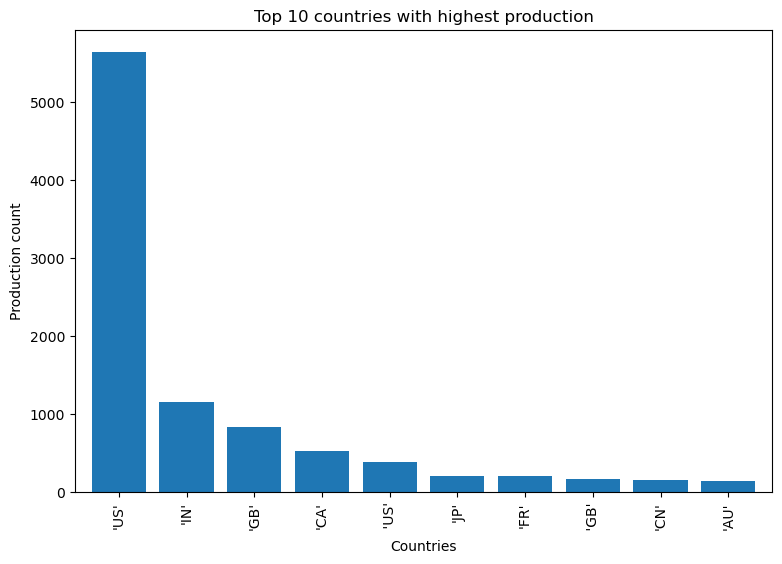

In [44]:
top_10_countries.plot(kind = 'bar', width =0.8, figsize=(9, 6))
plt.title('Top 10 countries with highest production')
plt.xlabel('Countries')
plt.ylabel('Production count')
plt.show()

In [45]:
year_count = titles.release_year.value_counts()
year_count

release_year
2021    1140
2020     878
2019     864
2018     757
2017     618
        ... 
1923       3
1916       2
1913       1
1912       1
1917       1
Name: count, Length: 112, dtype: int64

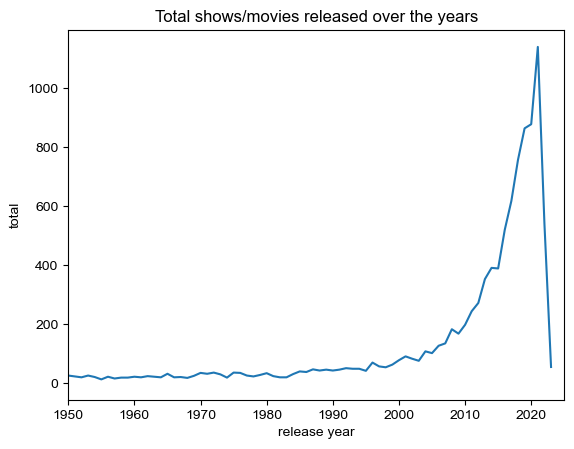

In [46]:
sns.lineplot(data= year_count)
sns.set(rc={'figure.figsize':(100,8.27)})
plt.title('Total shows/movies released over the years')
plt.xlim(1950, 2025)
plt.xlabel('release year')
plt.ylabel('total')
plt.show()

In [47]:
data = titles.merge(credits, how = 'outer', on= 'id')
data.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm87233,It's a Wonderful Life,MOVIE,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],0.0,8.6,27.611,8.261,25020.0,James Stewart,George Bailey,ACTOR
1,tm87233,It's a Wonderful Life,MOVIE,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],0.0,8.6,27.611,8.261,26190.0,Donna Reed,Mary Hatch,ACTOR
2,tm87233,It's a Wonderful Life,MOVIE,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],0.0,8.6,27.611,8.261,25653.0,Lionel Barrymore,Mr. Potter,ACTOR
3,tm87233,It's a Wonderful Life,MOVIE,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],0.0,8.6,27.611,8.261,13301.0,Thomas Mitchell,Uncle Billy,ACTOR
4,tm87233,It's a Wonderful Life,MOVIE,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],0.0,8.6,27.611,8.261,34171.0,Henry Travers,Clarence,ACTOR


In [48]:
director = data[data['role'] == 'DIRECTOR']
director.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,tmdb_popularity,tmdb_score,person_id,name,character,role
115,tm87233,It's a Wonderful Life,MOVIE,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],0.0,8.6,27.611,8.261,20177.0,Frank Capra,NaN,DIRECTOR
150,tm143047,Duck Soup,MOVIE,1933,0,69,"['comedy', 'war']",['US'],0.0,7.8,9.013,7.357,60962.0,Leo McCarey,NaN,DIRECTOR
186,tm83884,His Girl Friday,MOVIE,1940,0,92,"['drama', 'romance', 'comedy']",['US'],0.0,7.8,14.759,7.433,23839.0,Howard Hawks,NaN,DIRECTOR
227,tm5012,Red River,MOVIE,1948,0,133,"['western', 'drama', 'romance', 'action']",['US'],0.0,7.8,12.400,7.400,23839.0,Howard Hawks,NaN,DIRECTOR
259,tm82253,The Best Years of Our Lives,MOVIE,1947,0,171,"['drama', 'romance', 'war']",['US'],0.0,8.1,16.056,7.838,13717.0,William Wyler,NaN,DIRECTOR


In [49]:
top_10_director = director.sort_values(['tmdb_score','tmdb_popularity'], ascending = False)[['name', 'tmdb_score','tmdb_popularity']].head(10)
top_10_director

,name,tmdb_score,tmdb_popularity
136443,Sun Kai Kai,10.0,9.687
117799,Raymond Lee Wai-Man,10.0,7.478
117800,Cha Chuen-Yee,10.0,7.478
135112,Kel Thompson,10.0,4.439
137198,Nathan Shepka,10.0,3.577
134672,Michael Sean Hall,10.0,2.996
119619,Brandon Bergin,10.0,2.729
61162,Theresa Demarest,10.0,2.652
137821,Ryan Pollin,10.0,2.607
135756,Steven Durgarn,10.0,2.540


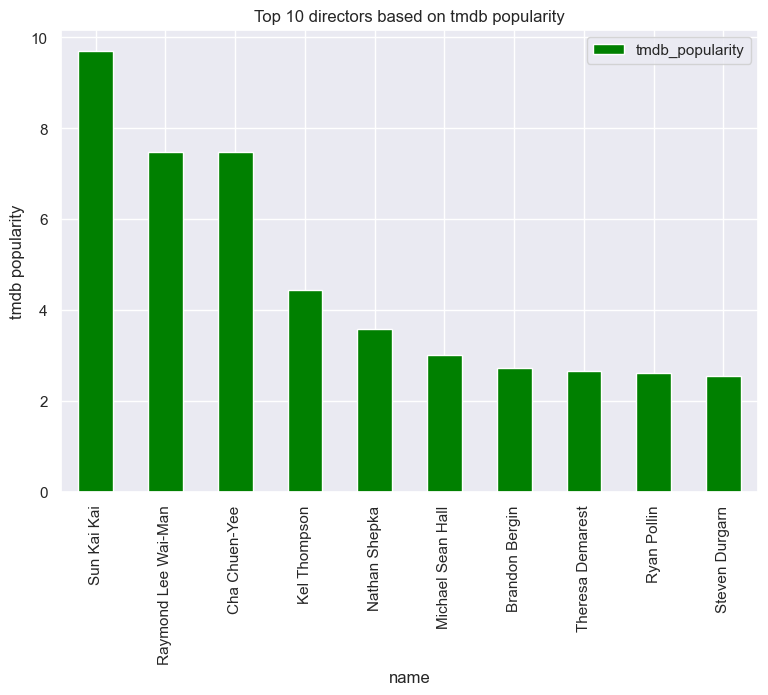

In [50]:
top_10_director.plot(kind= 'bar', y = 'tmdb_popularity', x = 'name', figsize= (9,6), color= 'green')
plt.xlabel('name')
plt.ylabel('tmdb popularity')
plt.title('Top 10 directors based on tmdb popularity')
plt.show()

In [51]:
type_count = titles.type.value_counts()
type_count.head()

type
MOVIE    9322
SHOW     1551
Name: count, dtype: int64

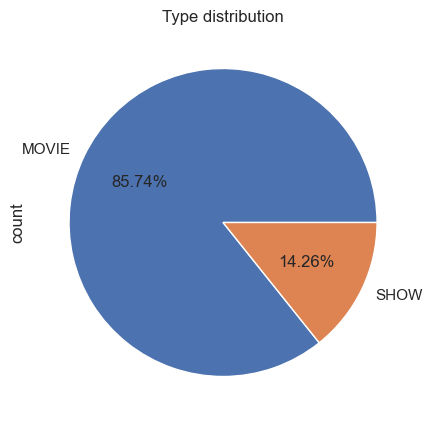

In [52]:
type_count.plot(kind= 'pie', figsize=(10, 5), autopct= '%.2f%%')
plt.title('Type distribution')
plt.show()

In [53]:
top_10_based_on_tmdb_rating = titles.sort_values(['tmdb_score', 'tmdb_popularity'], ascending= False)[['title','tmdb_score','tmdb_popularity', 'type']].head(10)
top_10_based_on_tmdb_rating

,title,tmdb_score,tmdb_popularity,type
10096,Time Flies and You Are Here,10.0,9.687,SHOW
8349,Flying Tiger II,10.0,7.478,SHOW
6862,Let's Go Luna!,10.0,7.057,SHOW
2270,The Wubbulous World of Dr. Seuss,10.0,5.961,SHOW
9970,The Terrible Adventure,10.0,4.439,MOVIE
4875,Tenkai Knights,10.0,4.296,SHOW
6893,Rainbow Rangers,10.0,3.809,SHOW
4480,A Chef's Life,10.0,3.722,SHOW
10149,"Do, Re & Mi",10.0,3.713,SHOW
10155,Holiday Monday,10.0,3.577,MOVIE


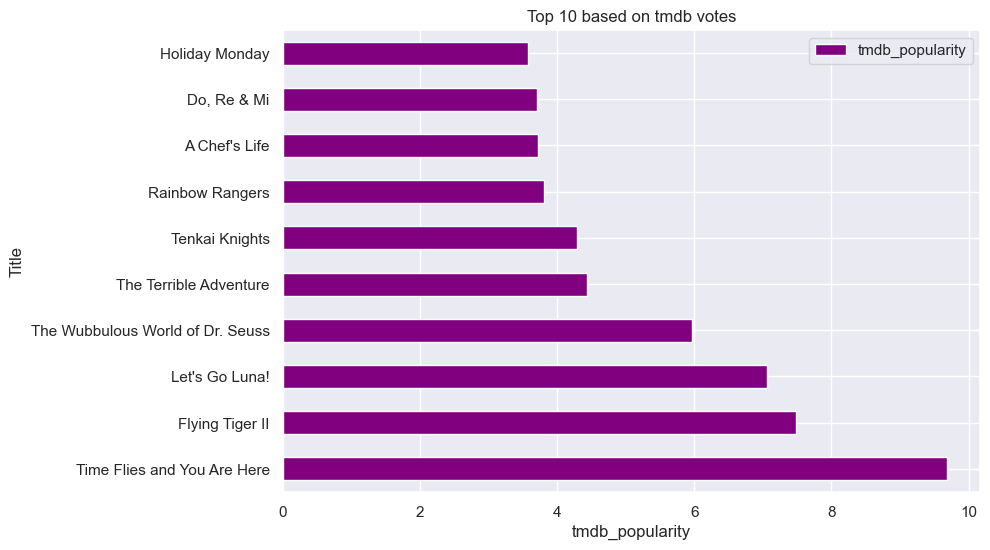

In [54]:
top_10_based_on_tmdb_rating.plot(kind='barh', x = 'title', y = 'tmdb_popularity', figsize=(9, 6), color = 'purple')
plt.title('Top 10 based on tmdb votes')
plt.xlabel('tmdb_popularity')
plt.ylabel('Title')
plt.show()

In [55]:
titles_new=pd.read_csv("titles.csv")
shows = titles_new[titles_new['type'] == "SHOW"]
shows = shows.dropna(subset=['imdb_id','imdb_score','imdb_votes','tmdb_popularity','tmdb_score','description'])


In [56]:
genres_df=shows[['id','genres']]
genres_df

,id,genres
3,ts20945,"['comedy', 'family']"
5,ts37076,['comedy']
247,ts55748,"['reality', 'family']"
939,ts3386,"['scifi', 'action', 'crime', 'romance', 'thril..."
940,ts42867,"['family', 'fantasy', 'music']"
...,...,...
10841,ts365330,['documentation']
10842,ts369924,"['comedy', 'reality']"
10845,ts363288,"['drama', 'action']"
10857,ts379207,"['comedy', 'drama']"


In [57]:
genres_df.set_index('genres',inplace=True)

In [58]:
genres_df=genres_df.drop('[]')

In [59]:
genres_df=genres_df.reset_index()

In [60]:
for i in range(len(genres_df['genres'])):
    ini_list = genres_df['genres'][i]
    res = ini_list.strip('][').split(', ')
    genres_df['genres'][i]=res

In [61]:
new_df_2=genres_df.genres.apply(pd.Series).\
merge(genres_df, right_index = True, left_index = True).\
drop(["genres"], axis = 1)\
.melt(id_vars = ['id'], value_name = "genres")\
.drop("variable", axis = 1).dropna()

In [62]:
new_df_2.head(5)

,id,genres
0,ts20945,'comedy'
1,ts37076,'comedy'
2,ts55748,'reality'
3,ts3386,'scifi'
4,ts42867,'family'


In [63]:
new_df_2['genres'].value_counts()

genres
'drama'            564
'comedy'           431
'animation'        244
'action'           208
'family'           205
'scifi'            190
'thriller'         175
'romance'          175
'fantasy'          170
'documentation'    167
'crime'            163
'reality'           98
'european'          94
'history'           78
'horror'            63
'sport'             50
'war'               43
'music'             30
'western'           13
Name: count, dtype: int64

In [64]:
Most_common_genres = new_df_2.genres.value_counts()

# object to df
Most_common_genres = pd.DataFrame(Most_common_genres)

# change column titles
Most_common_genres.rename(columns = {'genres':'total_shows'}, inplace = True)

# filter top 10 values. 
top_10_genres= Most_common_genres.head(10)

In [65]:
Most_common_genres.head()

,count
genres,
'drama',564
'comedy',431
'animation',244
'action',208
'family',205


In [71]:
plt.figure(figsize=(15,9))

# Bar chart 
top_10_genres_plot = sns.barplot(x=top_10_genres.index, y=top_10_genres['total_shows'], data=top_10_genres, ci=None)
plt.title('10 most common genres')
plt.xlabel('genres')
plt.ylabel('Production count')

plt.show()


KeyError: 'total_shows'

<Figure size 1500x900 with 0 Axes>

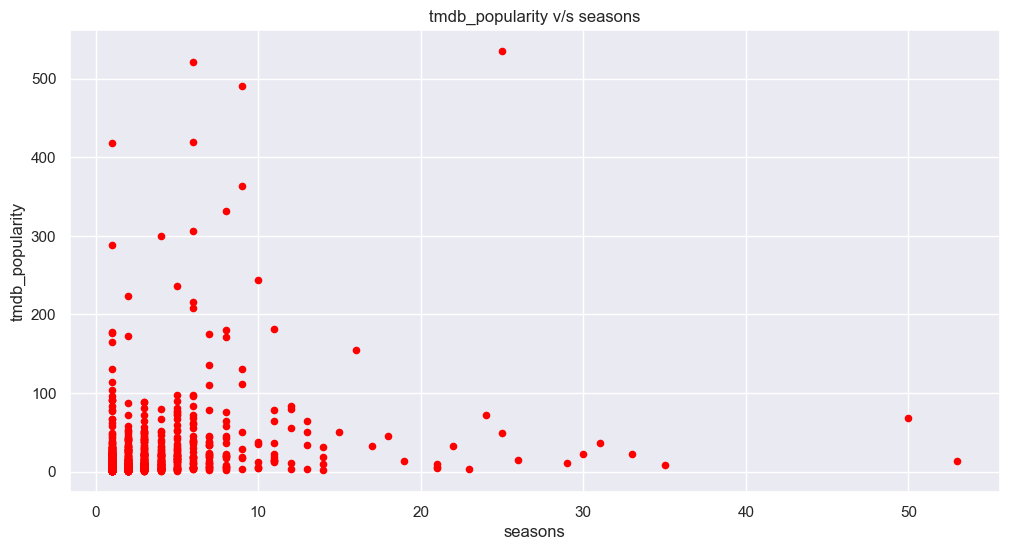

In [67]:
shows.plot(kind='scatter',x='seasons',y='tmdb_popularity',figsize=(12,6),color='red')
plt.xlabel('seasons')
plt.ylabel('tmdb_popularity')
plt.title('tmdb_popularity v/s seasons')
plt.show()
